<a href="https://colab.research.google.com/github/nilotpalc/Python-Training/blob/master/Epsilon_Value_DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Epsilon Value Determination for DBSCAN Algorithm

In [1]:
import pandas as pd
import numpy as np
import math

np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=pd.concat([df, pd.DataFrame(PointsInCircum(300,700))]) # Pass a list of DataFrames to concat
df=pd.concat([df, pd.DataFrame(PointsInCircum(100,300))]) # Pass a list of DataFrames to concat

# Adding noise to the dataset
df=pd.concat([df, pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])]) # Pass a list of DataFrames to concat

In [2]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

In [3]:
"""
distances create an array with each index representing the data point position\
    in the original dataframe. The list for each index starts with zero meaning distance to itself followed by the nearest neighbour.\
it is best to use n_neighbors = 2 as it will plot the immediate nearest neighbor
"""

'\ndistances create an array with each index representing the data point position    in the original dataframe. The list for each index starts with zero meaning distance to itself followed by the nearest neighbour.it is best to use n_neighbors = 2 as it will plot the immediate nearest neighbor\n'

In [4]:
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [5]:
distances = np.sort(distances, axis=0)
# this is possible because the first element in each list object is zero
    # sorting along axis = 0 sorts the objects by the second column which is the

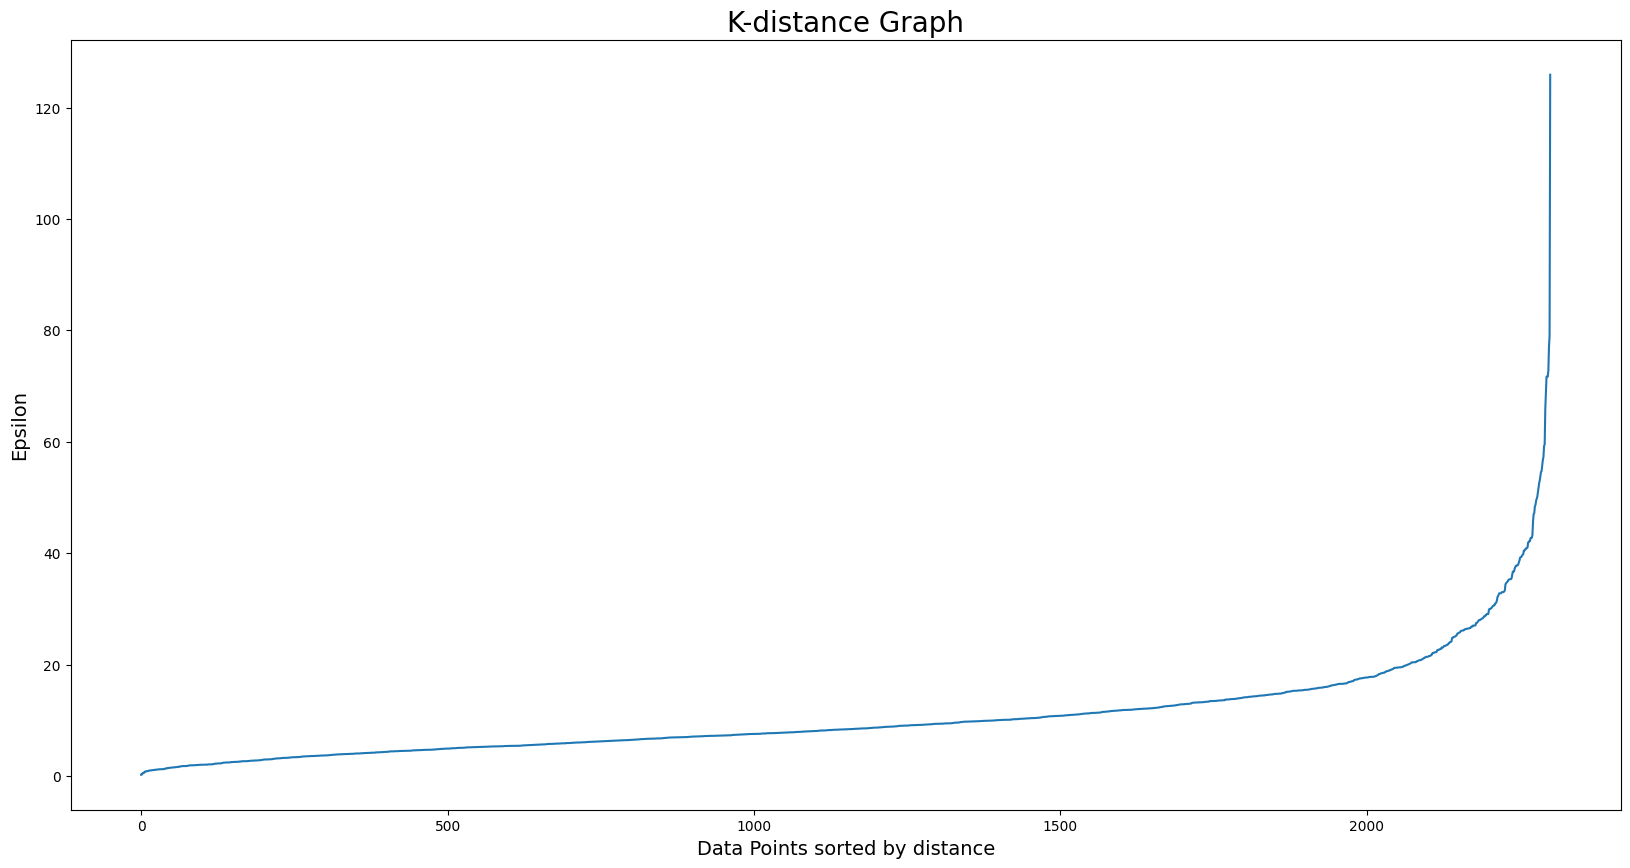

In [6]:
import matplotlib.pyplot as plt

distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14) # there are 2300 datapoints
                                                # and the x-axis is the index of the numpy array distances
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [7]:
%pip install kneed

In [11]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(distances)),  #x values
                      distances, # y values
                      S=4.0, #read the kneed library documentation
                      curve="convex", #read the kneed library documentation
                      direction="increasing") #read the kneed library documentation

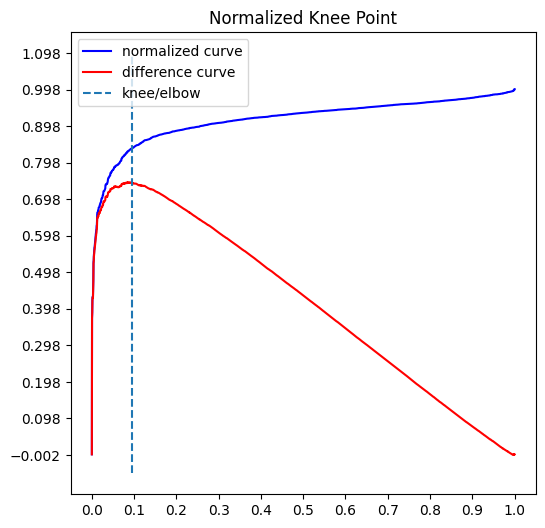

In [12]:
kneedle.plot_knee_normalized()

In [13]:
print(kneedle.elbow)
print(kneedle.elbow_y) # the correct value of epsilon
print(kneedle.knee_y)

2080
20.43931257141276
20.43931257141276
